In [2]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
from sentence_transformers import SentenceTransformer, util
import seaborn as sns

2025-07-22 09:50:54.871285: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-22 09:50:54.884627: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753170654.901065  296526 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753170654.905571  296526 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753170654.917960  296526 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [3]:
model = SentenceTransformer("sentence-transformers/LaBSE")  # multilingual incl. Latin

In [4]:
s1 = "Obama speaks to the media in Illinois"
s2 = "The President greets the press in Chicago"

embeddings = model.encode([s1, s2])
similarity = util.cos_sim(embeddings[0], embeddings[1])
similarity

tensor([[0.5022]])

In [6]:
embeddings[1][:10]

array([-0.04123626, -0.02643672, -0.05469761, -0.08008091,  0.06705057,
       -0.04439548,  0.00916991, -0.07949224, -0.03589591,  0.00591373],
      dtype=float32)

In [8]:
s1 = "What's your name?"
s2 = "Wie heisst du?"
embeddings = model.encode([s1, s2])
similarity = util.cos_sim(embeddings[0], embeddings[1])
similarity

tensor([[0.9085]])

In [10]:
latin_sentences = [
    # 🟩 Original Biblical Verse
    "In principio erat Verbum, et Verbum erat apud Deum, et Deus erat Verbum.",

    # 🟨 Quoted / Paraphrased Versions
    "Verbum erat in principio, apud Deum erat, et Deus erat illud Verbum.",
    "Initio fuit Sermo, qui cum Deo erat, et ipse Deus fuit.",
    "Ab initio cum Deo erat sermo divinus, Deus enim ipse fuit.",
    "Verbum aeternum Deum manifestavit ab initio.",

    # 🟥 Unrelated Sentences
    "Caesar Rubiconem transivit cum legionibus suis.",
    "Cogito, ergo sum.",
    "Tempora mutantur, et nos mutamur in illis.",
    "Fiat voluntas testatoris in omnibus observanda est.",
    "Avis in ramis cantavit ante solis ortum."
]

In [11]:
embeddings = model.encode(latin_sentences)

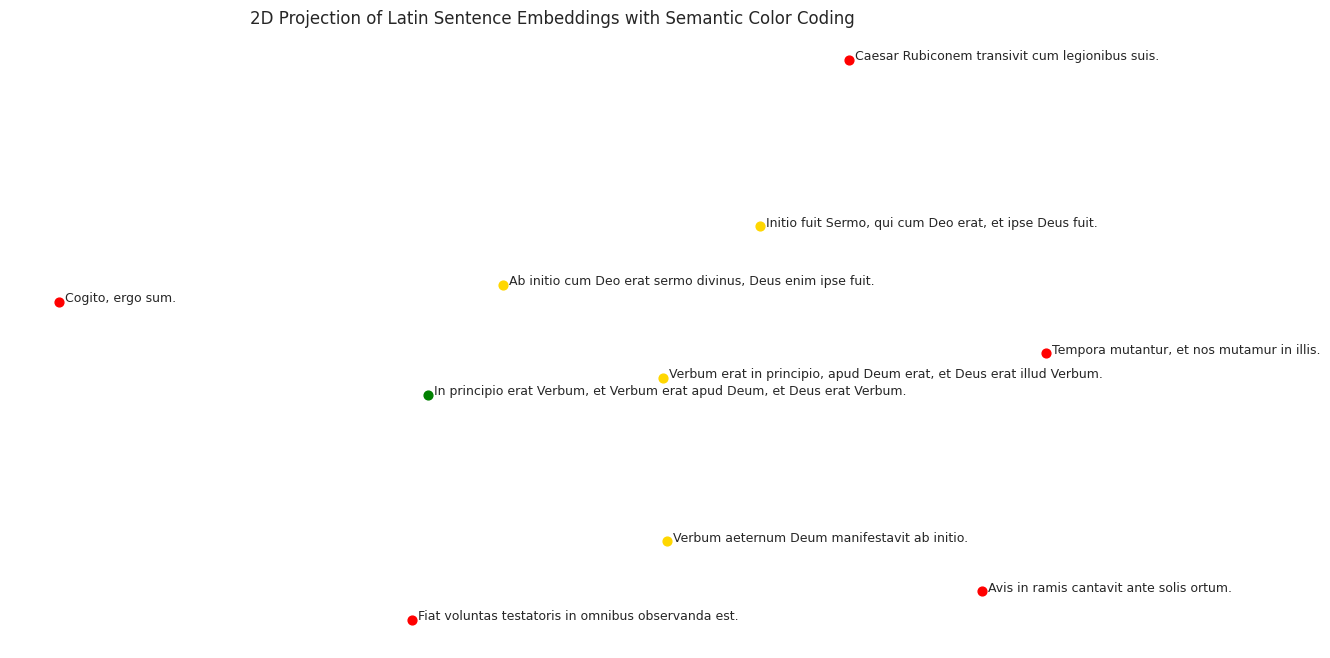

In [12]:
# Project into 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=3)
embeddings_2d = tsne.fit_transform(embeddings)

# Define colors
colors = ['green'] + ['gold'] * 4 + ['red'] * 5

# Plot the results
plt.figure(figsize=(14, 8))
for i, (x, y) in enumerate(embeddings_2d):
    plt.scatter(x, y, color=colors[i], s=40)
    plt.text(x + 0.5, y, latin_sentences[i], fontsize=9)

plt.xticks([])
plt.yticks([])
plt.box(False)
plt.grid(False)
plt.title("2D Projection of Latin Sentence Embeddings with Semantic Color Coding")
plt.show()

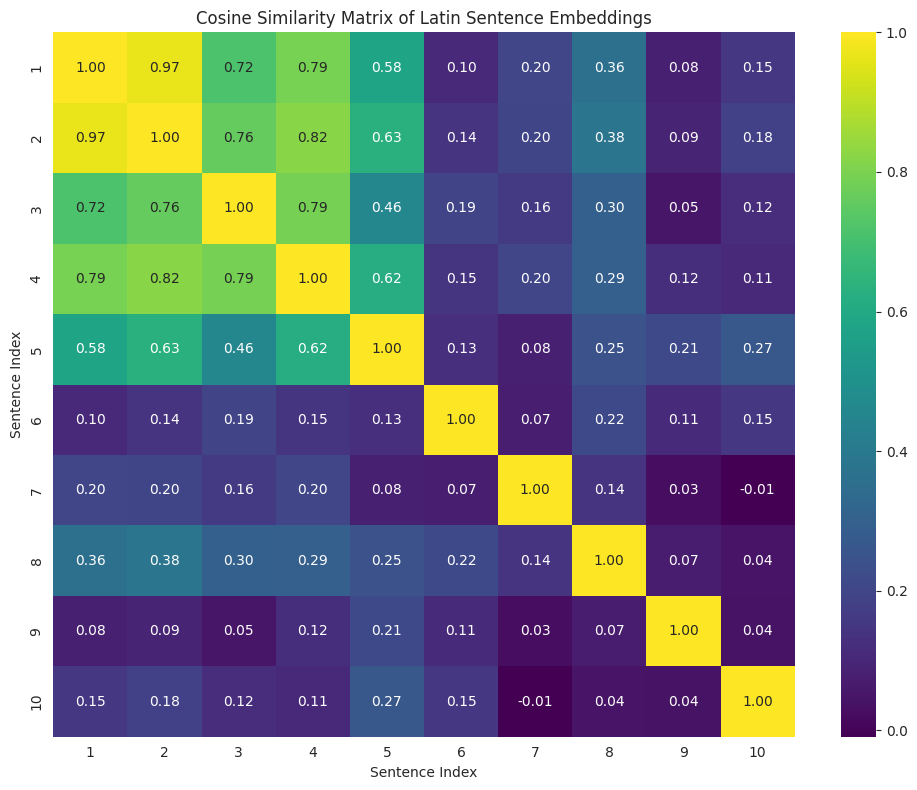

In [19]:
# Compute cosine similarity matrix
cos_sim_matrix = util.cos_sim(embeddings, embeddings).cpu().numpy()

# Plot similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cos_sim_matrix, annot=True, fmt=".2f", cmap="viridis",
            xticklabels=[f"{i+1}" for i in range(len(latin_sentences))],
            yticklabels=[f"{i+1}" for i in range(len(latin_sentences))])
plt.title("Cosine Similarity Matrix of Latin Sentence Embeddings")
plt.xlabel("Sentence Index")
plt.ylabel("Sentence Index")
plt.tight_layout()
plt.show()